Data: https://www.kaggle.com/nasa/meteorite-landings

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

Code to filter the meteorite data. Only needs to be run once.

In [3]:
meteorites = pd.read_csv("./data/meteorite-landings.csv", delimiter=",")
filtered_coords = (meteorites["Longitude"] >= -180) & (meteorites["Longitude"] <= 180) & ((meteorites["Longitude"] != 0) | (meteorites["Latitude"] != 0))
filtered_years = (meteorites["Year"] >= 860) & (meteorites["Year"] <= 2016)
filtered_mass = (meteorites["Mass"] >= 100)
filtered_meteorites = meteorites[filtered_coords & filtered_years & filtered_mass]
filtered_meteorites.drop("GeoLocation", axis=1, inplace=True)
# filtered_meteorites["Mass"] = filtered_meteorites["Mass"] / 1000
filtered_meteorites.to_csv("./data/cleansed-data.csv")
filtered_meteorites

C:\Users\benja\AppData\Local\Temp\ipykernel_6728\1904416170.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_meteorites.drop("GeoLocation", axis=1, inplace=True)


,Name,ID,Type,Class,Mass,Fell,Year,Latitude,Longitude
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000
5,Adhi Kot,379,Valid,EH4,4239.0,Fell,1919.0,32.10000,71.80000
...,...,...,...,...,...,...,...,...,...
45709,Zhongxiang,30406,Valid,Iron,100000.0,Found,1981.0,31.20000,112.50000
45710,Zillah 001,31355,Valid,L6,1475.0,Found,1990.0,29.03700,17.01850
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460


Code to plot the data

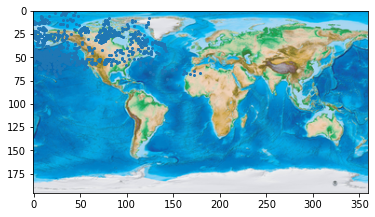

In [4]:
cleansed_meteorites = pd.read_csv("./data/cleansed-data.csv", delimiter=",")
img = Image.open("images/map.jpg")
img.thumbnail((360, 200), Image.ANTIALIAS)
ax = plt.subplot()
ax.scatter(cleansed_meteorites["Longitude"], cleansed_meteorites["Latitude"], s=4)
# plt.figure(figsize=(20,15))
ax.imshow(img)
plt.show()
# plt.savefig("./images/testplot.png", format="png")

In [5]:
# Meteorite landings across the world

fig = px.scatter_geo(filtered_meteorites,lat='Latitude',lon='Longitude',hover_name="Name",color="Mass",projection="natural earth")
fig.update_layout(title = 'Meteorite Landings Across the World', title_x=.5)
fig.show()

In [11]:
# Figure of meteorite landings in the US

fig = go.Figure(data=go.Scattergeo(
        locationmode = 'USA-states',
        lon = filtered_meteorites['Longitude'],
        lat = filtered_meteorites['Latitude'],
        text = "Mass " + filtered_meteorites['Mass'].astype(str),
        mode = 'markers',
        marker = dict(
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            cmin = 0,
            color = filtered_meteorites['Mass'],
            cmax = filtered_meteorites['Mass'].max(),
            colorbar_title="Mass of Meteorites"
        )))
fig.update_layout(
        title = 'Meteorites in the US',
        geo = dict(
            scope='usa',
            projection_type='albers usa',
            showland = True,
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )
fig.show()

In [34]:
# Calculates the the average meteorite mass per year

def GetAverageMeteoriteMass(year, number):
    sum = 0
    for i in range(len(filtered_meteorites)):
        if filtered_meteorites.iloc[i].Year == year:
            sum += filtered_meteorites.iloc[i].Mass
    return sum / number

filter_old = filtered_meteorites['Year'] > 1766
filtered_meteorites_per_year = filtered_meteorites[filter_old]
filtered_meteorites_per_year = filtered_meteorites_per_year['Year'].value_counts()
average_meteorite_mass_per_year = []
for i in range(len(filtered_meteorites_per_year.index)):
    year = filtered_meteorites_per_year.index[i]
    number = filtered_meteorites_per_year.values[i]
    print(GetAverageMeteoriteMass(year, number))
    average_meteorite_mass_per_year.append(GetAverageMeteoriteMass(year, number))
print(average_meteorite_mass_per_year)

4317.823209509656
1465.762396694214
827.1918068181814
1722.2352332657194
952.8691136363639
4163.356132211536
2594.235217391304
2489.0420895522393
2695.619999999998
3554.3291639871377
2466.2165625000034
7016.325281690139
1895.6054999999992
1943.164518828451
1674.3578297872346
9628.682746113987
1897.533854748604
20954.617134502925
3667.1457668711664
7515.812810457522
24777.46097902098
5113.7512857142865
6207.9886153846155
4188.354615384615
19745.12578125
6383.766923076927
4276.1
4224.957462264151
7421.920952380952
21369.968725490202
1491.7941176470576
2751.1333333333337
2328.583626373626
2349.910112359551
32924.617045454565
4296.0157407407405
53533.744230769225
7346.8065217391295
58119.693333333336
168082.68222222224
42623.7756097561
16388.448717948715
26165.271794871795
15354.877777777778
36474.01142857143
11191.808571428572
67665.44705882354
11229.854545454544
11504.983870967742
21089.766666666666
18613.303333333333
11806.446666666667
121687.22068965517
59846.84285714286
23863.86153846

In [35]:
# Figure of the # of meteorites per year and their average mass

fig = px.scatter(filtered_meteorites_per_year,title="Number of Meteorites Per Year",
color=average_meteorite_mass_per_year,
labels={
    "index": "Year",
    "value": "Number of Meteorites",
    "color": "Average Mass"
}
)
fig.update_layout(showlegend=False)
fig.show()  